In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
from google.colab import drive
# 1. Mount Google Drive
# This step will prompt you to authorize Google Colab to access your Google Drive.
print("Mounting Google Drive...")
drive.mount('/content/drive/')
print("Google Drive mounted successfully!")

Mounting Google Drive...
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Google Drive mounted successfully!


In [2]:
# 2. Define the path to your CSV files
csv_folder_path = '/content/drive/My Drive/LSTM_results'

In [3]:
# Check if the folder exists
if not os.path.exists(csv_folder_path):
    print(f"Error: Folder not found at '{csv_folder_path}'")
    print("Please make sure the folder name is correct and it exists in your Google Drive.")
else:
    print(f"Accessing folder: {csv_folder_path}")

    # 3. List all CSV files in the specified folder
    csv_files = [f for f in os.listdir(csv_folder_path) if f.endswith('.csv')]

    if not csv_files:
        print(f"No CSV files found in '{csv_folder_path}'. Please check the folder content.")
    else:
        print(f"Found {len(csv_files)} CSV files:")
        for f in csv_files:
            print(f"- {f}")

        # 4. Initialize an empty list to store DataFrames
        all_dfs = []

        # 5. Loop through each CSV file, read it into a DataFrame, and append to the list
        print("\nReading and appending CSV files...")
        for csv_file in csv_files:
            file_path = os.path.join(csv_folder_path, csv_file)
            try:
                df = pd.read_csv(file_path)
                all_dfs.append(df)
                print(f"Successfully read: {csv_file}")
            except Exception as e:
                print(f"Error reading {csv_file}: {e}")

        # 6. Concatenate all DataFrames into a single DataFrame
        if all_dfs:
            try:
                combined_df = pd.concat(all_dfs, ignore_index=True)
                print("\nAll CSV files successfully combined into one DataFrame!")
                print("\nCombined DataFrame Info:")
                combined_df.info()
                print("\nFirst 5 rows of the combined DataFrame:")
                print(combined_df.head())
                print(f"\nTotal rows in combined DataFrame: {len(combined_df)}")
            except Exception as e:
                print(f"Error concatenating DataFrames: {e}")
        else:
            print("No DataFrames were successfully read to combine.")

# Optional: Save the combined DataFrame to a new CSV file in your Google Drive
# output_path = '/content/drive/My Drive/combined_data.csv'
# if 'combined_df' in locals(): # Check if combined_df was created
#     try:
#         combined_df.to_csv(output_path, index=False)
#         print(f"\nCombined DataFrame saved to: {output_path}")
#     except Exception as e:
#         print(f"Error saving combined DataFrame: {e}")

Accessing folder: /content/drive/My Drive/LSTM_results
Found 6 CSV files:
- 13304050_result_df_202506091614.csv
- 13304050_result_df_202506091619.csv
- 13304050_result_df_202506091621.csv
- 13342500_result_df_202506091628.csv
- 13342500_result_df_202506091630.csv
- 13342500_result_df_202506091633.csv

Reading and appending CSV files...
Successfully read: 13304050_result_df_202506091614.csv
Successfully read: 13304050_result_df_202506091619.csv
Successfully read: 13304050_result_df_202506091621.csv
Successfully read: 13342500_result_df_202506091628.csv
Successfully read: 13342500_result_df_202506091630.csv
Successfully read: 13342500_result_df_202506091633.csv

All CSV files successfully combined into one DataFrame!

Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   current_time   6 non-null      object 
 1   model_site 

In [4]:
combined_df.sort_values(by=['model_site','KGE'])

,current_time,model_site,train_month,h1,h2,d1,d2,batch,look_back,optimizer,learning_rate,r2,rmse,bias,std_ratio,correlation,KGE
1,2025-06-09 16:19:08.958185,13304050,"[3, 4, 5, 6, 7, 8]",100,100,0.05,0.025,16,90,<keras.src.optimizers.adam.Adam object at 0x7e...,0.001,0.366495,1.496082,-1.338033,1.027712,0.938693,[0.88267386]
0,2025-06-09 16:14:23.439140,13304050,"[3, 4, 5, 6, 7, 8]",200,100,0.05,0.025,16,90,<keras.src.optimizers.adam.Adam object at 0x7d...,0.001,0.664037,1.089498,-0.688947,1.026950,0.902188,[0.88711586]
2,2025-06-09 16:21:11.472098,13304050,"[3, 4, 5, 6, 7, 8]",400,100,0.05,0.025,16,90,<keras.src.optimizers.adam.Adam object at 0x7a...,0.001,0.692966,1.041534,-0.852572,0.998009,0.949250,[0.92043523]
5,2025-06-09 16:33:53.584965,13342500,"[3, 4, 5, 6, 7, 8]",200,100,0.05,0.025,16,23,<keras.src.optimizers.adam.Adam object at 0x7f...,0.001,0.922750,0.968252,-0.176003,0.948384,0.962413,[0.93380172]
3,2025-06-09 16:28:15.371937,13342500,"[3, 4, 5, 6, 7, 8]",200,100,0.05,0.025,16,90,<keras.src.optimizers.adam.Adam object at 0x7d...,0.001,0.916006,1.005010,-0.106229,0.986038,0.958121,[0.95462726]
4,2025-06-09 16:30:53.077344,13342500,"[3, 4, 5, 6, 7, 8]",200,100,0.05,0.025,16,45,<keras.src.optimizers.adam.Adam object at 0x7c...,0.001,0.922021,1.004744,-0.008793,0.985275,0.960542,[0.9578747]


In [5]:



result =  combined_df.groupby('model_site').agg({'rmse': 'min', 'bias':'min','r2': 'max','KGE': 'max'})

print(result)

result.to_csv('best_KGE_result.csv')

                rmse      bias        r2           KGE
model_site                                            
13304050    1.041534 -1.338033  0.692966  [0.92043523]
13342500    0.968252 -0.176003  0.922750   [0.9578747]


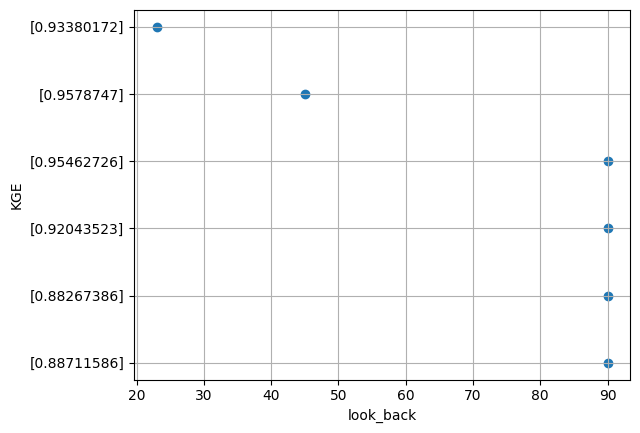

In [6]:
x='look_back'
y='KGE'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y])
plt.xlabel( x)
plt.ylabel( y )
plt.title( '')
plt.grid(True)
plt.show()


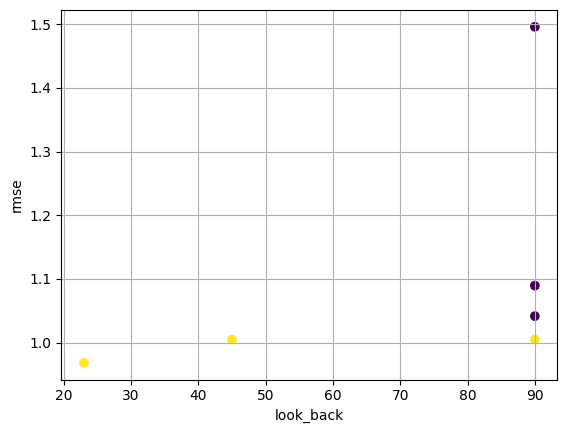

In [7]:
x='look_back'
y='rmse'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y] , c= combined_df['model_site'] )
plt.xlabel( x)
plt.ylabel( y )
plt.title('' )
plt.grid(True)
plt.show()

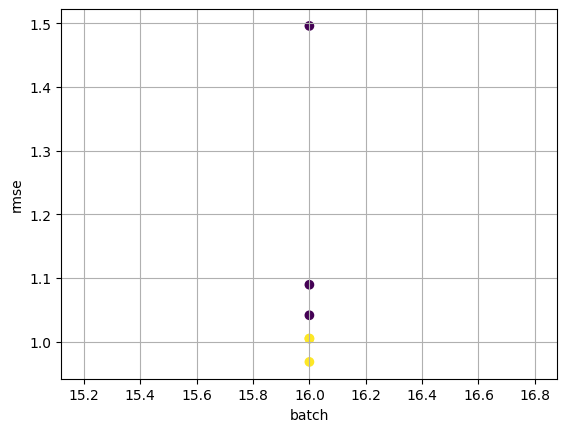

In [8]:
x='batch'
y='rmse'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y] , c= combined_df['model_site'] )
plt.xlabel( x)
plt.ylabel( y )
plt.title('' )
plt.grid(True)
plt.show()